# Traffic Accidents in Belgrade, Serbia, 2018

1. Traffic accidents by month / weekdays
2. Traffic accidents by damage type
3. Heatmap of Traffic Accidents sorted by Months and Weekdays
4. Monthly Heatmap of Traffic Accidents By Damage Type
5. Accident types

In [13]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar

In [30]:
vehicle_incidents_serbia = pd.read_csv('/Users/markouskokovic/Desktop/saobracaj_srbija 2.csv', encoding = "ISO-8859-1")
vehicle_incidents_serbia.columns = ['id', 'date_time', 'longitude', 'latitude', 'damage_type', 'accident_type', 'description']
vehicle_incidents_serbia.head()

,id,date_time,longitude,latitude,damage_type,accident_type,description
0,1203512,"01.01.2018,15:25",20.455290,44.807350,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA Ð BEZ SKRETANjA,Najmanje dva vozila koja se kre_u u istom smer...
1,1203466,"01.01.2018,00:10",20.515090,44.813862,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgoda sa jednim vozilom na kolovozu
2,1203518,"01.01.2018,13:20",20.388714,44.822182,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Ostali sudari sa parkiranim vozilom
3,1203521,"01.01.2018,00:05",20.264630,44.380690,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Sudar sa parkiranim vozilom sa leve strane kol...
4,1203625,"01.01.2018,04:30",20.408376,44.761337,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Sudar sa parkiranim vozilom sa leve strane kol...


In [31]:
vehicle_incidents_serbia.shape

(18062, 7)

In [34]:
vehicle_incidents_serbia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18062 non-null  int64  
 1   date_time      18062 non-null  object 
 2   longitude      18062 non-null  float64
 3   latitude       18062 non-null  float64
 4   damage_type    18062 non-null  object 
 5   accident_type  18062 non-null  object 
 6   description    18062 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 987.9+ KB


# Data Cleaning

In [35]:
# Change date_time column to datetime type
vehicle_incidents_serbia.date_time = pd.to_datetime(vehicle_incidents_serbia.date_time)

In [36]:
# Make 2 new columns: 1)time 2)date

vehicle_incidents_serbia['time'], vehicle_incidents_serbia['date'] = vehicle_incidents_serbia.date_time.apply(lambda x: x.time()), vehicle_incidents_serbia.date_time.apply(lambda x: x.date())

In [37]:
# Create a weekday and month column

vehicle_incidents_serbia['weekday'] = vehicle_incidents_serbia.date_time.dt.weekday
vehicle_incidents_serbia['month'] = vehicle_incidents_serbia.date_time.dt.month

In [38]:
vehicle_incidents_serbia.head()

,id,date_time,longitude,latitude,damage_type,accident_type,description,time,date,weekday,month
0,1203512,2018-01-01 15:25:00,20.455290,44.807350,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA Ð BEZ SKRETANjA,Najmanje dva vozila koja se kre_u u istom smer...,15:25:00,2018-01-01,0,1
1,1203466,2018-01-01 00:10:00,20.515090,44.813862,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgoda sa jednim vozilom na kolovozu,00:10:00,2018-01-01,0,1
2,1203518,2018-01-01 13:20:00,20.388714,44.822182,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Ostali sudari sa parkiranim vozilom,13:20:00,2018-01-01,0,1
3,1203521,2018-01-01 00:05:00,20.264630,44.380690,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Sudar sa parkiranim vozilom sa leve strane kol...,00:05:00,2018-01-01,0,1
4,1203625,2018-01-01 04:30:00,20.408376,44.761337,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Sudar sa parkiranim vozilom sa leve strane kol...,04:30:00,2018-01-01,0,1


In [39]:
# Change the name of the values in damage_type column - translate to english

vehicle_incidents_serbia = vehicle_incidents_serbia.replace({'damage_type' : {'Sa mat.stetom' : 'Physical damage no injuries', 'Sa povredjenim' : 'With injuries', 'Sa poginulim' : 'Accident with death result'}})

In [40]:
# Change dtype of description column
vehicle_incidents_serbia['description'] = vehicle_incidents_serbia.description.astype(str)

# 1. Traffic accidents per month \ weekday


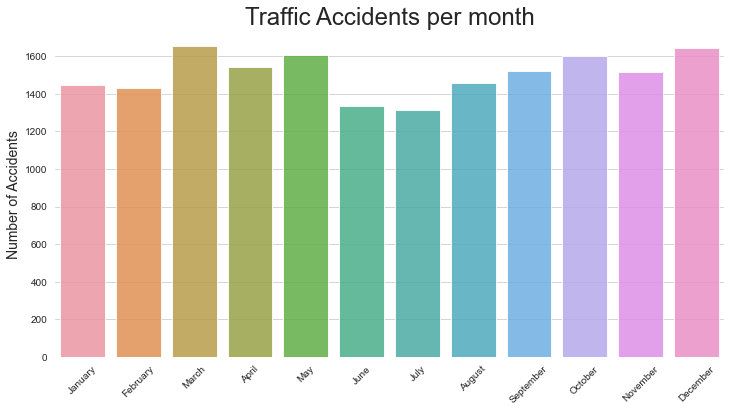

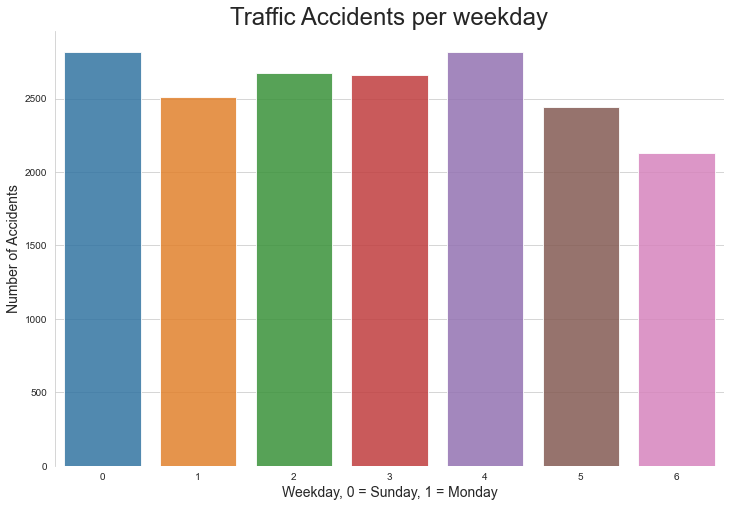

In [41]:
accidents_per_month = vehicle_incidents_serbia.month.value_counts()
accidents_per_weekday = vehicle_incidents_serbia.weekday.value_counts()

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(accidents_per_month.index, accidents_per_month.values,
           alpha=0.85)
plt.title('Traffic Accidents per month', fontsize = 24)
plt.ylabel('Number of Accidents', fontsize = 14)
plt.xticks(range(0,12), labels=calendar.month_name[1:13], rotation=45)
sns.despine(left=True, bottom=True)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(accidents_per_weekday.index, accidents_per_weekday.values,
           alpha = 0.85)
plt.title('Traffic Accidents per weekday', fontsize=24)
plt.xlabel('Weekday, 0 = Sunday, 1 = Monday', fontsize = 14)
plt.ylabel('Number of Accidents', fontsize = 14)
sns.despine(top = True, right=True, bottom=True)
plt.show()

# 2. Traffic accidents by damage type

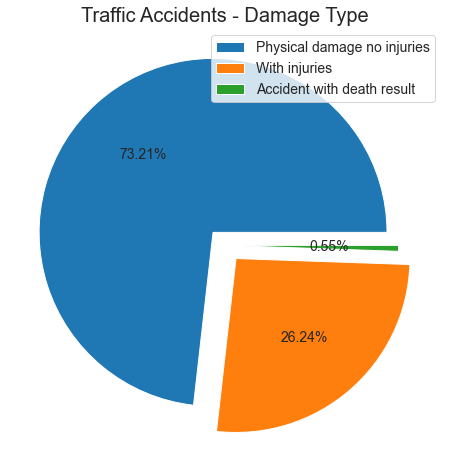

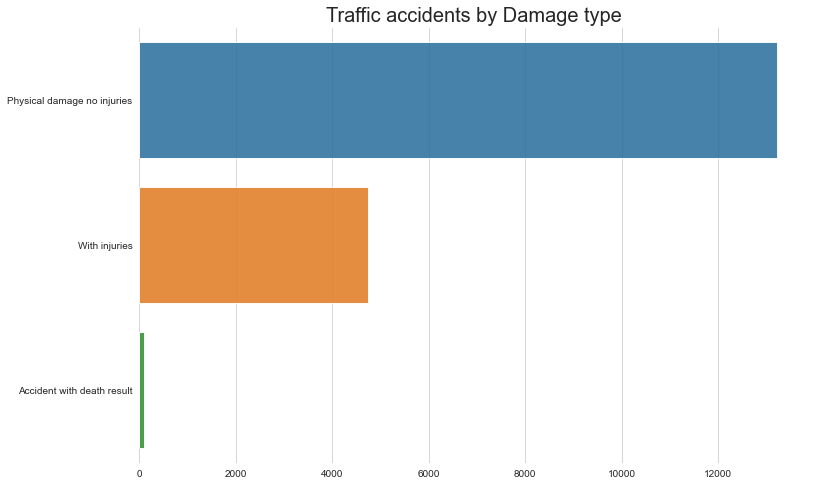

In [44]:
damage_type = vehicle_incidents_serbia.damage_type.value_counts(normalize = True) * 100
d_t = vehicle_incidents_serbia.damage_type.value_counts()

plt.figure(figsize=(8,8))
plt.pie(damage_type,
       #labels = damage_type.index,
       autopct = '%.2f%%',
        explode = [0.1, 0.1,0],
        textprops={'fontsize': 14}
       )
plt.legend(damage_type.index, loc="best", fontsize=14)
plt.title('Traffic Accidents - Damage Type', fontsize=20)
plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.barplot(d_t.values, d_t.index,
           alpha = 0.9)
plt.title("Traffic accidents by Damage type", fontsize = 20)
sns.despine(left = True, bottom = True)
plt.show()

# 3. Heatmap of Traffic Accidents sorted by Months and Weekdays

In [50]:
new = vehicle_incidents_serbia.groupby(['month', 'weekday']).size().unstack()#.sort_values(ascending=False)
new
#z = new[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", 'Sunday']]
#z

weekday,0,1,2,3,4,5,6
month,,,,,,,
1,253,236,240,208,164,186,159
2,221,229,208,197,161,209,204
3,202,196,242,293,297,262,160
4,247,203,197,251,221,225,197
5,225,235,265,273,258,192,157
6,174,166,188,182,262,203,160
7,225,216,173,181,214,150,156
8,220,177,228,257,248,146,181
9,255,202,218,192,219,234,203


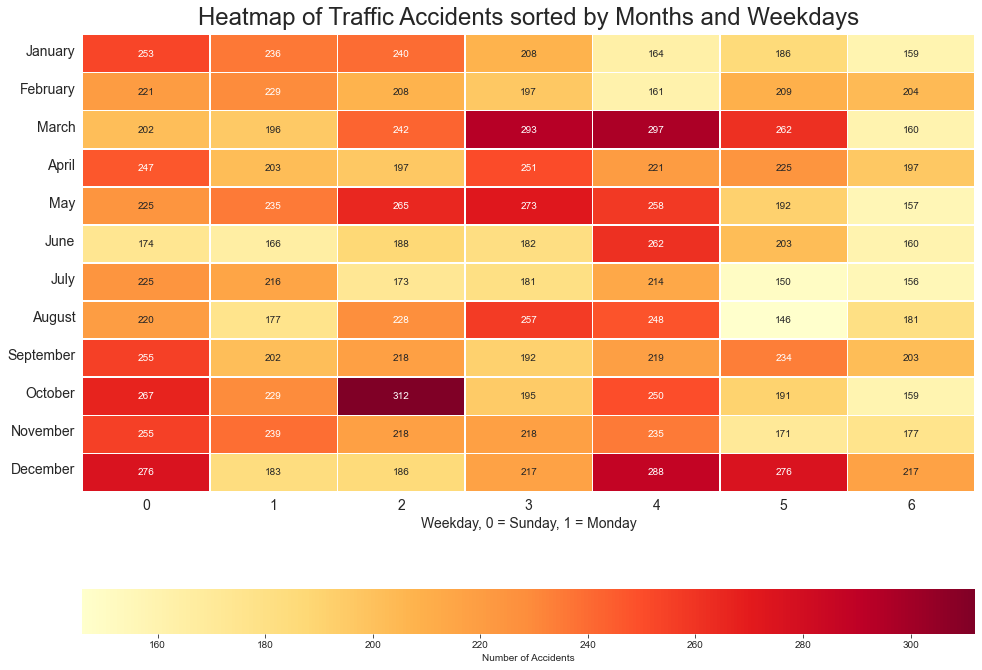

In [58]:
plt.figure(figsize=(16,12))
sns.heatmap(new, annot=True,
            fmt="g",
            cmap='YlOrRd',
            linewidths=.4,
           cbar_kws={'label': 'Number of Accidents', 'orientation': 'horizontal'}
           )
plt.title('Heatmap of Traffic Accidents sorted by Months and Weekdays', fontsize = 24, pad = 10)
plt.xlabel('Weekday, 0 = Sunday, 1 = Monday', fontsize = 14)
plt.ylabel('')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yticks(np.linspace(0.4, 11.4, 12), calendar.month_name[1:13], rotation=0 )
plt.show()

# 4. Monthly Heatmap of Traffic Accidents By Damage Type 

In [61]:
a = vehicle_incidents_serbia.groupby(['month', 'damage_type']).size().unstack()
a = a[['Physical damage no injuries', 'With injuries', 'Accident with death result']]
a

damage_type,Physical damage no injuries,With injuries,Accident with death result
month,,,
1,1082,358,6
2,1047,376,6
3,1229,414,9
4,1094,440,7
5,1141,451,13
6,1017,311,7
7,953,349,13
8,1047,401,9
9,1139,381,3


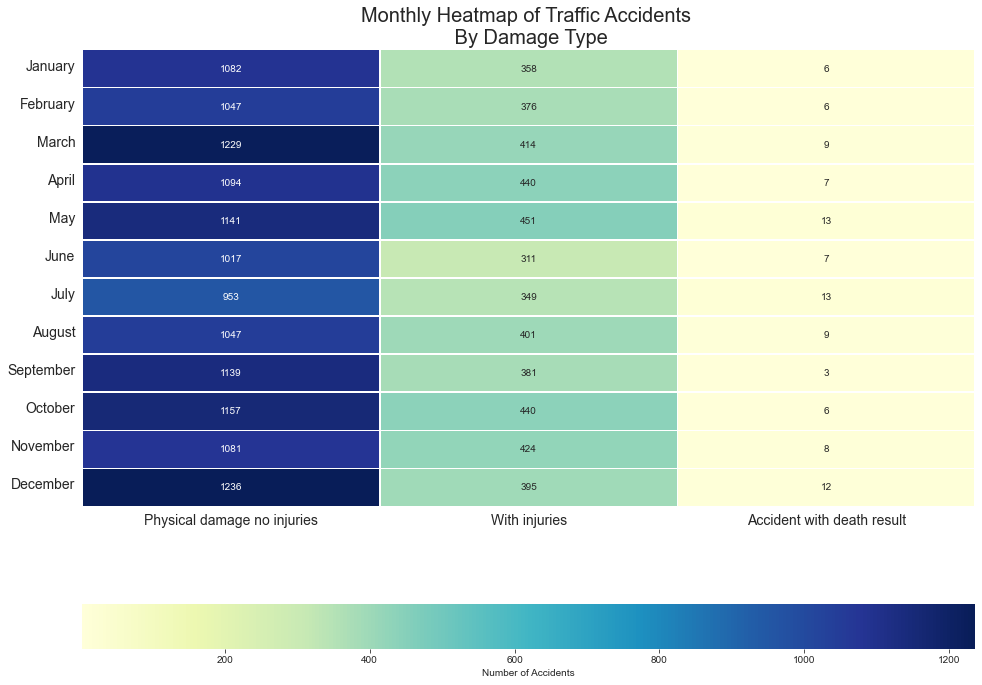

In [70]:
plt.figure(figsize=(16, 12))
sns.heatmap(a,
           annot=True,
           fmt = 'g',
           cmap = 'YlGnBu',
           linewidth = 0.4,
           cbar_kws={'label': 'Number of Accidents', 'orientation': 'horizontal'}
           )
plt.title('Monthly Heatmap of Traffic Accidents \n By Damage Type', fontsize=20)
plt.xlabel("")
plt.ylabel('')
plt.xticks(fontsize = 14)

plt.yticks(np.linspace(0.4, 11.4, 12), labels=calendar.month_name[1:13], rotation = 0, fontsize = 14)
plt.show()

# 5. Accident types

In [85]:
# Change the name of the values in accident_type column - translate to english

vehicle_incidents_serbia = vehicle_incidents_serbia.replace({'accident_type' : {'SN SA NAJMANjE DVA VOZILA Ð BEZ SKRETANjA' : '2+ vehicles involved without changing lanes',
                                                                               'SN SA NAJMANjE DVA VOZILA Ð SKRETANjE ILI PRELAZAK' : '2+ vehicles involved with changing lanes and turns',
                                                                               'SN SA PARKIRANIM VOZILIMA' : 'Parked vehicle involved',
                                                                               'SN SA JEDNIM VOZILOM' : '1 vehicle involved',
                                                                               'SN SA PE_ACIMA': 'Pedestrians involved'}})

In [88]:
acc_type = vehicle_incidents_serbia.accident_type.value_counts()
acc_type

2+ vehicles involved without changing lanes           6742
2+ vehicles involved with changing lanes and turns    4541
Parked vehicle involved                               3223
1 vehicle involved                                    2477
Pedestrians involved                                  1079
Name: accident_type, dtype: int64

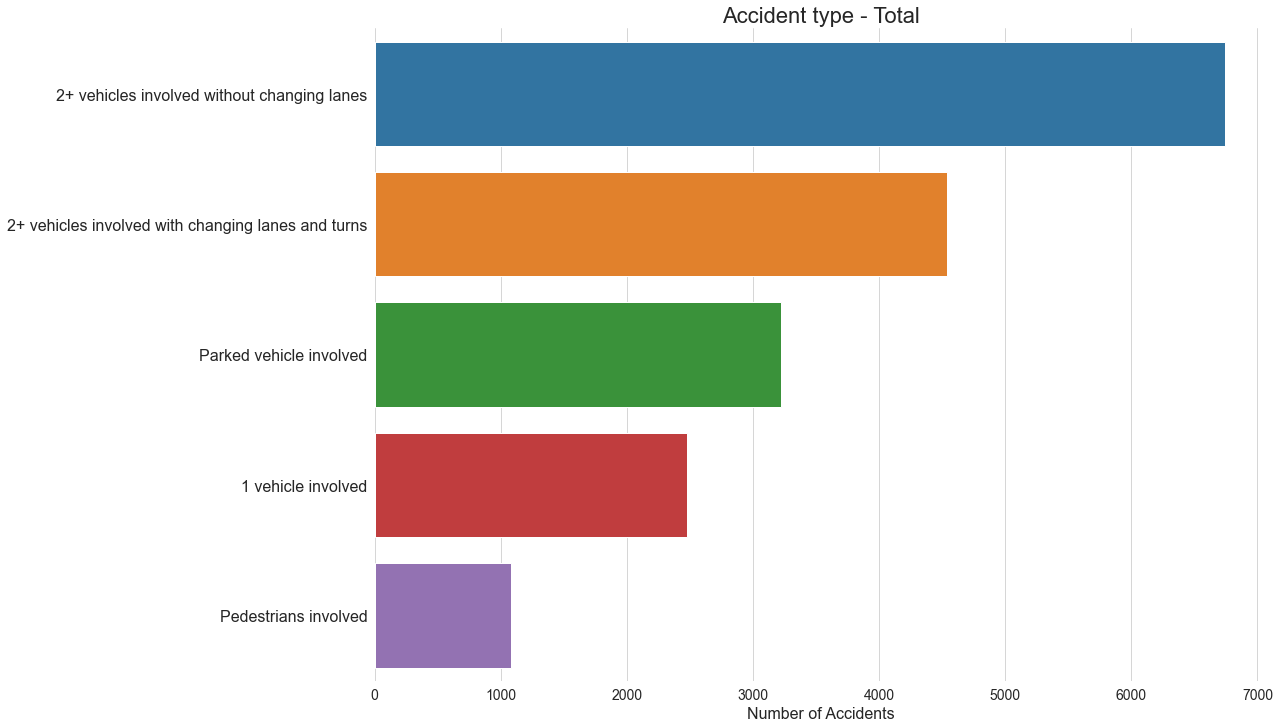

In [95]:
plt.figure(figsize=(16,12))
sns.barplot(acc_type.values, acc_type.index,
           alpha = 1)
plt.title('Accident type - Total', fontsize=22)
plt.xlabel('Number of Accidents', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
sns.color_palette("hls", 5)
sns.despine(left=True, right=True, bottom=True)
plt.show()

### Accidents with a dead result

In [98]:
death_accidents = vehicle_incidents_serbia[vehicle_incidents_serbia.damage_type == 'Accident with death result']
death_accidents.head()

accidents_with_injury = vehicle_incidents_serbia[vehicle_incidents_serbia.damage_type == 'With injuries']

In [102]:
vehicle_incidents_serbia

,id,longitude,latitude,damage_type,accident_type,description,time,date,weekday,month
0,1203512,20.455290,44.807350,Physical damage no injuries,2+ vehicles involved without changing lanes,Najmanje dva vozila koja se kre_u u istom smer...,15:25:00,2018-01-01,0,1
1,1203466,20.515090,44.813862,Physical damage no injuries,1 vehicle involved,Nezgoda sa jednim vozilom na kolovozu,00:10:00,2018-01-01,0,1
2,1203518,20.388714,44.822182,Physical damage no injuries,Parked vehicle involved,Ostali sudari sa parkiranim vozilom,13:20:00,2018-01-01,0,1
3,1203521,20.264630,44.380690,Physical damage no injuries,Parked vehicle involved,Sudar sa parkiranim vozilom sa leve strane kol...,00:05:00,2018-01-01,0,1
4,1203625,20.408376,44.761337,Physical damage no injuries,Parked vehicle involved,Sudar sa parkiranim vozilom sa leve strane kol...,04:30:00,2018-01-01,0,1
...,...,...,...,...,...,...,...,...,...,...
18057,1240571,20.465793,44.787871,Physical damage no injuries,2+ vehicles involved with changing lanes and t...,Ostale nezgode sa najmanje dva vozila koja se ...,07:00:00,2018-12-31,0,12
18058,1240998,20.463665,44.815548,Physical damage no injuries,2+ vehicles involved with changing lanes and t...,Najmanje dva vozila koja se kre_u istim putem ...,20:45:00,2018-12-31,0,12
18059,1240796,20.362122,44.807540,Physical damage no injuries,2+ vehicles involved without changing lanes,Najmanje dva vozila koja se kre_u u istom smer...,07:00:00,2018-12-31,0,12
18060,1240797,20.458234,44.813082,Physical damage no injuries,2+ vehicles involved without changing lanes,Najmanje dva vozila koja se kre_u u istom smer...,10:50:00,2018-12-31,0,12


In [104]:
vehicle_incidents_serbia.to_csv(r'\Users\markouskokovic\desktop\saob_nezgode_2.csv')